In [2]:
#załądowanie pakietu karas
import keras

#Biblioteka na poziomie modelu. Zapewnia bloki konstrukcyjne, nie obsługując jednak niskopoziomowych
#operacji, takich jak działania na tensorach, polegając m. in. na TensorFlow.

Using TensorFlow backend.


In [3]:
#pobranie zestawu danych wraz z odpowiednimi bibliotekami
from keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [4]:
#załadowanie danych
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

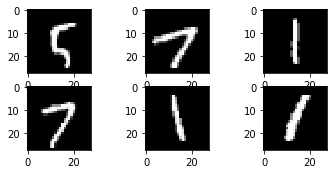

In [5]:
#wyświetlenie sześciu pierwszych obrazków
for i in range(6):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_images[100 + i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

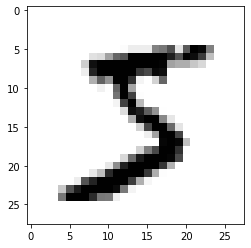

In [6]:
#obrazy są trójwymiarowe tj.mają wysokość, szerokość i głębie koloru
#mnist jest w skali szarości więc ma tylko jeden kanał koloru
#jest on trzywymiarowym tensorem danych (60 000, 28, 28, 1) - (probki, wysokość, szerokość, głębia_koloru)
#wyświetlenie pierwszego obrazka
import matplotlib.pyplot as plt

first_number = train_images[0]
plt.imshow(first_number, cmap=plt.cm.binary)

In [7]:
#wyświetlenie jak wyglądają dane, ich liczebność oraz kształ
print(len(train_labels))
print(len(test_labels))
print(train_images.shape)
print(test_images.shape)

60000
10000
(60000, 28, 28)
(10000, 28, 28)


In [8]:
network_1 = models.Sequential()

In [9]:
#Użycie klasy Sequential jest polecane przy tworzeniu liniowych stosów warst. Interfejs API pozwala tworzyć o dowolnej architekturze.

In [10]:
dpt_model = models.Sequential()
network_1.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
dpt_model.add(layers.Dropout(0.5))
network_1.add(layers.Dense(10,activation='softmax'))

#softmax pozwala na normalizację, dzięki czemu sprawdza się dobrze przy dylematach klasyfikacji, gdzie wartości końcowe
#mogą być interpretowane jako prawdopodobieństwa

#będziemy całość przetwarzać za pomocą dwóch warst zwanych gęstymi (ich implementacją jest Dense)

#Porzucanie (ang. droput) jest jedną z najbardziej skutecznych i najpopularniejszych
#technik regularyzacji sieci neuronowych. Polega na losowym
#wybieraniu pewnej liczby cech wyjściowych warstwy podczas trenowania (wartości tych warstw są zastępowane zerami)

In [11]:
#output = relu(dot(W, input) + b)

In [12]:
network_1.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
#Optymalizator — sposób modyfikowania sieci na podstawie funkcji straty.
#Implementuje on określony wariant algorytmu stochastycznego spadku wzdłuż gradientu.

Funkcję straty (funkcję celu) — wartość, która będzie minimalizowana w procesietrenowania. Jest miarą sukcesu wykonywanego zadania.
W przypadku znanych problemów istotną sprawą jest samodzielne ustalenie funkcji celu, jednak w naszym problemie będziemy korzystać z kategoryzacyjnej entropii krzyżowej

In [14]:
#Ewaluacja każdego kolejnego atepu trenowania sieci sprowadza się do obliczenia wartości straty. Całość dostosowania się sieci
#do jej optymalnej formy prezentuje się w 5 punktach:
#1. Generowanie wsadu z próbek treningowych wraz z podpisami
#2. Uruchomienie sieci na ww. danych
#3. Obliczenie wartości straty i pomiar różnicy między predykcją, a właściwymi wartościami
#4. Obliczyć gradient straty
#5. Przesunięcie wartości parametrów, tj. wagi w kierunku przeciwnym do gradientu, co powinno zredukować stratę.

#Dodatkowo istotne jest, ażeby znaleźć globalne ekstremum, a nie lokalne. Można w tym celu skorzystać z gradientu wraz z tzw. pędem.
#W naszym modelu użyty zostanie optymalizator RMSprop, który sostosuje to w jakim stopniu wagi będą zmienione, dzięki bardziej
#dynamicznemu parametrowi learning_rate.

In [15]:
#Całośc działania, jakie musi podjąć analityk to
# - zdefiniować dane treningowe i testowe
# - zdefiniować warstwy sieci
# - skonfigurować proces uczenia, wybierając funkcję straty, optymalizaotr i monitorowane metryki
# - wykonać iteracje procesu uczenia na danych treningowych

In [16]:
#zmiana kształtu oraz typu zmiennych
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

#N

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Musimy dodatkowo zakodować etykiety za pomocą kategorii
#Będzie polegało na osadzeniu każdej etykiety w formie wektora wypełnionego samymi 
#zerami z liczbą 1 umieszczoną w miejscu indeksu etykiety.

In [18]:
network_1.fit(train_images, train_labels, epochs=4, batch_size=128)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2574 - accuracy: 0.9259
Epoch 2/4
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1033 - accuracy: 0.9694
Epoch 3/4
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0686 - accuracy: 0.9794
Epoch 4/4
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0493 - accuracy: 0.9850


In [19]:
#batch_size odpowiada za wielkość wsadu, a epochs za ilość tzw. epok, czyli powtórzeń procesu.

In [20]:
#wartość "test_acc" dla testowego jest niższa niż treningowego, gdyż wystąpił problem przetrenowania
test_loss, test_acc = network_1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.9787
